In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn import metrics

In [ ]:
main_data = pd.read_csv("/content/drive/MyDrive/Study/Semester 8 Project/training_sample.csv")
main_data = main_data.drop("UserID", axis=1)

In [ ]:
ar_training_data = main_data.replace(0, False)
ar_training_data = ar_training_data.replace(1, True)
ar_training_data

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False
4,False,True,False,True,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False
455397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
455398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False
455399,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


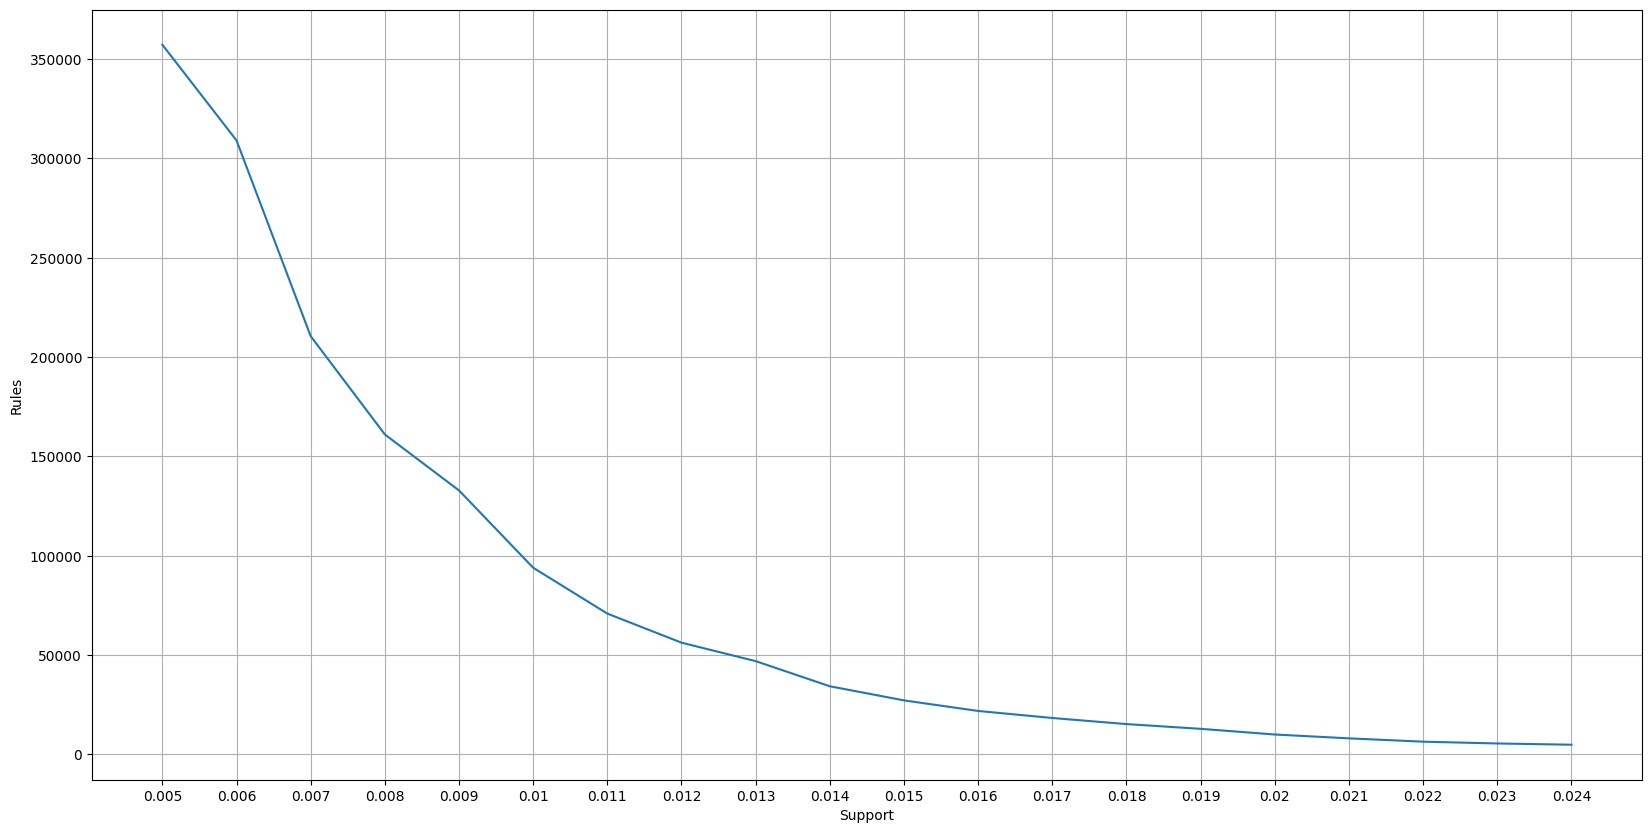

In [ ]:
support_values = [(i/1000) for i in range(5, 25)]
rules_count = []
for i in support_values:
  frequent_itemsets = apriori(ar_training_data, min_support=i, use_colnames=True)
  rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
  rules_count.append(len(rules))

support_values = [str(i) for i in support_values]
plt.figure(figsize=(20,10))
plt.plot(support_values, rules_count,)
plt.xlabel("Support")
plt.ylabel("Rules")
plt.grid()
plt.show()

In [ ]:
frequent_itemsets = apriori(ar_training_data, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.drop(["antecedent support", "consequent support", "leverage", "conviction"], axis=1)

In [ ]:
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x))
rules["consequents"] = rules["consequents"].apply(lambda x: list(x))

rules["consequents_len"] = rules["consequents"].apply(lambda x : len(x))

In [ ]:
rules = rules.loc[rules["consequents_len"] == 1]
rules['consequents'] = rules['consequents'].apply(lambda x : str(x[0]))
rules = rules.loc[rules["consequents"] == "ordered"]
rules = rules.drop(["consequents_len"], axis=1)

updated_index = [i for i in range(len(rules))]
rules["Index"] = updated_index
rules = rules.set_index("Index")

rules

<ipython-input-7-d64294e896ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules['consequents'] = rules['consequents'].apply(lambda x : str(x[0]))


,antecedents,consequents,support,confidence,lift
Index,,,,,
0,[basket_icon_click],ordered,0.029813,0.300689,7.171946
1,[basket_add_list],ordered,0.018265,0.245101,5.846087
2,[basket_add_detail],ordered,0.031021,0.274727,6.552708
3,[list_size_dropdown],ordered,0.022727,0.098659,2.353183
4,[checked_delivery_detail],ordered,0.041493,0.659938,15.740656
...,...,...,...,...,...
868,"[sign_in, checked_delivery_detail, device_mobi...",ordered,0.010999,0.884982,21.108356
869,"[sign_in, checked_delivery_detail, saw_checkou...",ordered,0.012306,0.905477,21.597200
870,"[sign_in, checked_delivery_detail, device_mobi...",ordered,0.011673,0.878532,20.954516


In [ ]:
ar_test_data = pd.read_csv("/content/drive/MyDrive/Study/Semester 8 Project/testing_sample.csv")
ar_test_data = ar_test_data.drop("UserID", axis=1)

In [ ]:
ar_test_data.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
ar_test_data_T = ar_test_data.transpose()
ar_test_data_T = ar_test_data_T.drop(["ordered"])
ar_test_data_T.head()

,0,1,2,3,4,5,6,7,8,9,...,151645,151646,151647,151648,151649,151650,151651,151652,151653,151654
basket_icon_click,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
basket_add_list,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
basket_add_detail,0,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
sort_by,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
image_picker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
true_action_list = []

for i in list(ar_test_data_T.columns):
  true_action_list.append(ar_test_data_T.index[ar_test_data_T[i] == 1].tolist())

In [ ]:
ant_rules = list(rules['antecedents'])

ant_rules_sorted = [sorted(item) for item in ant_rules]

In [ ]:
test_result = []

for item in true_action_list:
  if sorted(item) in ant_rules_sorted:
    test_result.append(1)
  else:
    test_result.append(0)

In [ ]:
actual = list(ar_test_data["ordered"])
predicted = test_result

In [ ]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
print(confusion_matrix)

[[91991 59664]
 [    0     0]]


In [ ]:
print(metrics.classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76    151655
           1       0.00      0.00      0.00         0

    accuracy                           0.61    151655
   macro avg       0.50      0.30      0.38    151655
weighted avg       1.00      0.61      0.76    151655



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
